In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [2]:
Ph_data = pd.read_csv("Datasets/Pharma_data.csv")

Ph_data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE
1,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
2,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
3,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
4,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX


In [3]:
Ph_data.iloc[:3,2:11]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4
1,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
2,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Ph_data_sc = scaler.fit_transform(Ph_data.iloc[:,2:11])

# Hierachial clustering

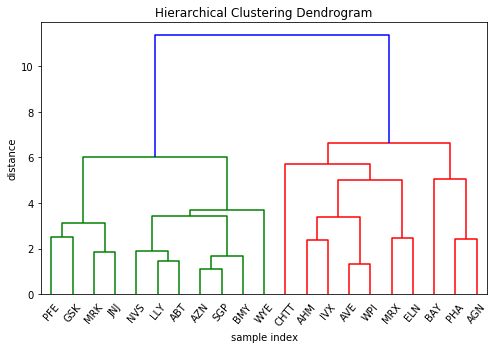

In [6]:
# generate the linkage matrix ---
Z = linkage(Ph_data_sc, 'ward', optimal_ordering= True) # single complete average ward

#### Dendrogram
plt.figure(figsize=(8,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
labels = np.array (Ph_data.iloc[:,0])
dendrogram(
    Z,
    labels = labels,
    leaf_rotation=50,  # rotates the x axis labels
    leaf_font_size=10,  # font size for the x axis labels
)
plt.show()


In [7]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 5, 4, 3, 3, 1, 2, 1, 2, 2, 2, 5, 5, 3, 1, 2, 2, 3, 3, 3, 1],
      dtype=int32)

In [8]:
Ph_data_hc = Ph_data.copy()

In [9]:
Ph_data_hc = Ph_data_hc.assign(Cluster = clusters)
Ph_data_hc.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,Cluster
0,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE,2
1,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE,5
2,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ,4
3,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,3
4,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX,3


In [25]:
Ph_data_hc.to_csv('Datasets/PH_DATA.csv')

In [10]:
# Cluster Profiling

size_hc = Ph_data_hc.groupby(Ph_data_hc.Cluster).count()

clus_hc = Ph_data_hc.iloc[:,2:11].groupby(Ph_data_hc.Cluster).mean()

clus_hc.insert(0,"size" ,size_hc.Symbol)

In [11]:
clus_hc

,size,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster,,,,,,,,,,
1,4,157.017500,0.480000,22.225000,44.425000,17.700000,0.950000,0.220000,18.532500,19.575000
2,7,62.882857,0.407143,20.228571,30.714286,13.385714,0.714286,0.385714,5.382857,20.514286
3,6,10.216667,0.583333,18.550000,15.766667,6.566667,0.533333,0.710000,23.601667,14.133333
4,1,0.410000,0.850000,26.000000,24.100000,4.300000,0.600000,3.510000,6.380000,7.500000
5,3,26.906667,0.640000,55.633333,10.100000,4.200000,0.700000,0.316667,6.996667,5.133333


In [12]:
from sklearn.cluster import KMeans

In [13]:
cluster_range = range( 1, 21 )
cluster_errors = []
for num_clusters in cluster_range:
              clusters = KMeans( num_clusters )
              clusters.fit( Ph_data_sc )
              cluster_errors.append( clusters.inertia_ )

In [14]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors }, 
                           columns= ['num_clusters','cluster_errors'] )
clusters_df

,num_clusters,cluster_errors
0,1,189.000000
1,2,124.497810
2,3,101.415277
3,4,83.213422
4,5,65.777509
5,6,54.801554
6,7,42.566323
7,8,36.459636
8,9,30.645209
9,10,24.639753


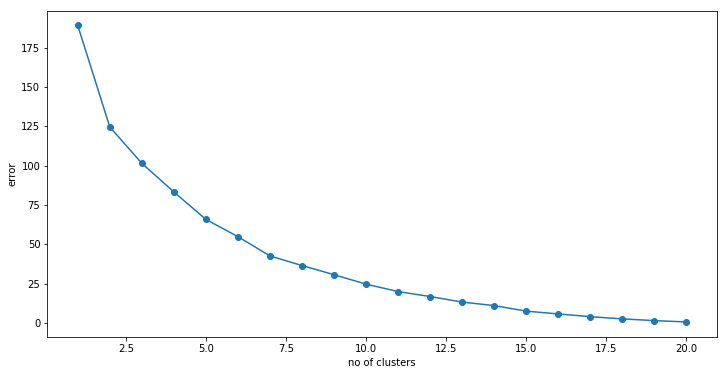

In [15]:
plot_1 = plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plot_1.axes[0].set_xlabel('no of clusters')
plot_1.axes[0].set_ylabel('error')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Ph_data_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [18]:
#print ('centroids', centroids)
print ('labels',labels)

labels [3 1 4 0 0 2 3 2 3 3 3 1 1 0 2 3 3 3 0 0 2]


In [19]:
Ph_data_clus = Ph_data.assign(Cluster = kmeans.labels_)

In [58]:
Ph_data_clus.to_csv("Datasets/PH_DATA.csv")

In [20]:
# Cluster Profiling

# size of cluster by each type-

size =Ph_data_clus.groupby(Ph_data_clus.Cluster).count()

clus_prof = Ph_data_clus.iloc[:,2:11].groupby(Ph_data_clus.Cluster).mean()

clus_prof.insert(0,"size" ,size.Symbol)

In [21]:
clus_prof

,size,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster,,,,,,,,,,
0,5,11.000000,0.60800,18.120000,15.9400,6.3200,0.4600,0.798000,26.912000,14.720000
1,3,26.906667,0.64000,55.633333,10.1000,4.2000,0.7000,0.316667,6.996667,5.133333
2,4,157.017500,0.48000,22.225000,44.4250,17.7000,0.9500,0.220000,18.532500,19.575000
3,8,55.810000,0.41375,20.287500,28.7375,12.6875,0.7375,0.371250,5.591250,19.350000
4,1,0.410000,0.85000,26.000000,24.1000,4.3000,0.6000,3.510000,6.380000,7.500000


In [22]:
clus_hc

,size,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster,,,,,,,,,,
1,4,157.017500,0.480000,22.225000,44.425000,17.700000,0.950000,0.220000,18.532500,19.575000
2,7,62.882857,0.407143,20.228571,30.714286,13.385714,0.714286,0.385714,5.382857,20.514286
3,6,10.216667,0.583333,18.550000,15.766667,6.566667,0.533333,0.710000,23.601667,14.133333
4,1,0.410000,0.850000,26.000000,24.100000,4.300000,0.600000,3.510000,6.380000,7.500000
5,3,26.906667,0.640000,55.633333,10.100000,4.200000,0.700000,0.316667,6.996667,5.133333


In [23]:
Ph_data_clus[Ph_data_clus.Cluster == 0].Symbol

3     AVE
4     IVX
13    WPI
18    ELN
19    MRX
Name: Symbol, dtype: object

In [24]:
Ph_data_hc[Ph_data_hc.Cluster == 3].Symbol

3     AVE
4     IVX
13    WPI
17    AHM
18    ELN
19    MRX
Name: Symbol, dtype: object